# Repaso Programacion Dinamica

Omar David Toledo Leguizamón

### Ejercicio 1

Given a string s, return the longest palindromic substring in s.

**Entradas y Salidas**

| E/S | Nombre | Tipo | Descripcion |
|-|-|-|-|
|E|s|**String**|Cadena de caracteres de entrada|
|S|s'|**String**|subcadena de caracteres de entrada|

**Función**: Se define una función $P(i,j)$ que representa si la subcadena desde $i$ y $j$ es palindrome o no (Es un booleano el resultado)

**Recurrencia**

$$P(i,j) = \left\{
    \begin{array}{}
        \top & & \text{si}  & & i=j \vee (j-i=1 \wedge s[i]=s[j]) \\
        \bot & & \text{si}  & & s[i]\neq s[j] \wedge j > i+1 \\
        P(i+1,j-1) & & \text{si}  & & s[i] =  s[j] \wedge j > i+1 \\
    \end{array}
 \right.$$

**Grafo de Necesidades**

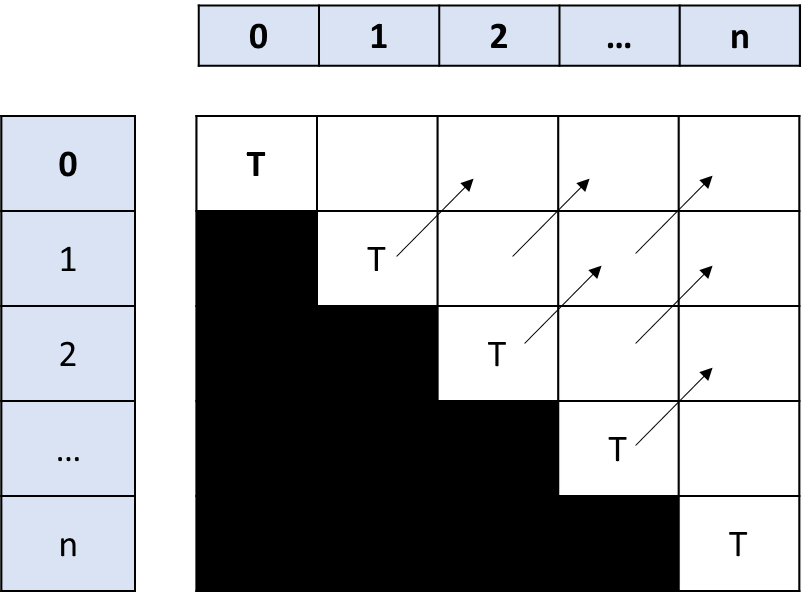

Podemos identificar que se puede hacer un recorrido por diagonales, o en su defecto, recorrer filas de abajo hacia arriba y columnas de izquierda a derecha

In [82]:
import numpy as np

class Solution(object):
    def longestPalindrome(self, s):
        """
        :type s: str
        :rtype: str
        """
        n = len(s)
        P = np.zeros(shape = (n,n) , dtype = bool)
        m = 0
        a,b = None,None
        for i in range(n-1,-1,-1):
            for j in range(i,n):
                if i==j or (j-i == 1 and s[i]==s[j]): P[i,j] = True
                elif j>i and s[i]!=s[j]: P[i,j]= False
                elif j>i and s[i]==s[j]: P[i,j]= P[i+1,j-1]

                if P[i,j] and j-i >= m:
                    m = j-i
                    a,b = i,j
        if a is not None: return s[a:b+1]
        return ''
    
Solution().longestPalindrome('babad')

'bab'

### Ejercicio 2

Given a string s and a dictionary of strings wordDict, return true if s can be segmented into a space-separated sequence of one or more dictionary words.

**Entradas y Salidas**

| E/S | Nombre | Tipo | Descripcion |
|-|-|-|-|
|E|s|**String**|Cadena de caracteres de entrada|
|E|d|Array of **String**|Diccionario de palabras a las que se puede segmentar|
|S|b|**bool**|Booleano que representa si el problema es soluble o no|

**Función**: Se define una función $D(i,j)$ que representa si la subcadena desde $i$ y $j$ se puede separar en las palabras del diccionario como o no (Es un booleano el resultado)

**Recurrencia**

$$D(i,j) = \left\{
    \begin{array}{}
        \bot & & \text{si}  & & i=j \\
        \top & & \text{si}  & & j>i \wedge \exists_{w} \, | \, w \in d : w = s[i:j+1] \\
        \exists_{k}  \, | \, i \leq k < j : D(i,k) \wedge D(k+1,j) & &   & & \text{en otro caso} \\
    \end{array}
 \right.$$

**Grafo de Necesidades**

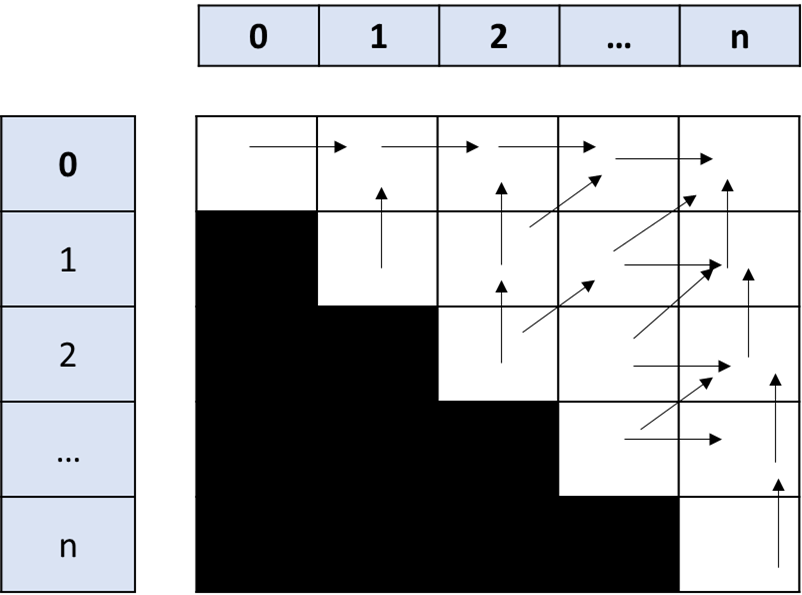

Podemos identificar que se puede hacer un recorrido por diagonales

In [83]:
import numpy as np

class Solution(object):
    def wordBreak(self, s, wordDict):
        """
        :type s: str
        :type wordDict: List[str]
        :rtype: bool
        """
        n = len(s)
        D = np.zeros(shape = (n,n), dtype=bool)
        for t in range(n):
            j = t
            i = 0
            while i<n and j<n:
                if i==j and s[i] not in wordDict: D[i,j] = False
                elif s[i:j+1] in wordDict: D[i,j] = True
                else:
                    b = False
                    for k in range(i,j):
                        b = b or (D[i,k] and D[k+1,j])
                    D[i,j] = b
                i+=1
                j+=1
        return D[0,n-1]
        

In [84]:
s = "catsandog"
wordDict = ["cats","dog","sand","and","cat"]
Solution().wordBreak(s,wordDict)

False

In [85]:
s = "leetcode"
wordDict = ["leet","code"]
Solution().wordBreak(s,wordDict)

True

In [86]:
s = "applepenapple"
wordDict = ["apple","pen"]
Solution().wordBreak(s,wordDict)

True

In [87]:
s = "ab"
wordDict = ["a","b"]
Solution().wordBreak(s,wordDict)

True